In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

##### Whale returns data is imported, indexed to datetime, and converted to dataframe, then checked for nulls and types. The nulls are dropped, and the result is assigned to new variable.

In [2]:
whale_returns_csv = pd.read_csv('./Resources/whale_returns.csv',
                                parse_dates = True,
                                index_col = 'Date',
                                infer_datetime_format = True)

whale_returns_messy = pd.DataFrame(whale_returns_csv)
whale_returns_messy

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
whale_returns_messy.dtypes


SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
whale_returns_messy.isna().sum().sum()

4

In [5]:
whale_returns = whale_returns_messy.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


##### Process is repeated for algo returns.

In [6]:
algo_returns_csv = pd.read_csv('./Resources/algo_returns.csv',
                                parse_dates = True,
                                index_col = 'Date',
                                infer_datetime_format = True)

algo_returns_messy = pd.DataFrame(algo_returns_csv)
algo_returns_messy

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
algo_returns_messy.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [8]:
algo_returns_messy.isna().sum().sum()

6

In [9]:
algo_returns = algo_returns_messy.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


##### Process is repeated for S&P 500 history, with dollar sign removed and resulting dataframe entries converted to floats.

In [10]:
sp500_history_csv = pd.read_csv('./Resources/sp500_history.csv',
                                parse_dates = True,
                                index_col = 'Date',
                                infer_datetime_format = True)

sp500_history_messy = pd.DataFrame(sp500_history_csv)
sp500_history_messy

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [11]:
sp500_history_messy.dtypes

Close    object
dtype: object

In [12]:
sp500_history_nodollar = sp500_history_messy.replace('\$', '', regex = True)
sp500_history = sp500_history_nodollar.astype(float)
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


##### Daily returns dataframe is created from S&P history, nulls then dropped and column renamed.

In [13]:
sp500_returns_messy = sp500_history.pct_change()
sp500_returns_messy.isnull().sum().sum()
sp500_returns_nonull = sp500_returns_messy.dropna()
sp500_returns = sp500_returns_nonull.rename(columns = {'Close': 'S&P500'})
sp500_returns

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


##### Dataframes are concatenated.

In [14]:
returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis = 1).dropna()
returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


##### Plotting returns and cumulative returns.

<AxesSubplot:xlabel='Date'>

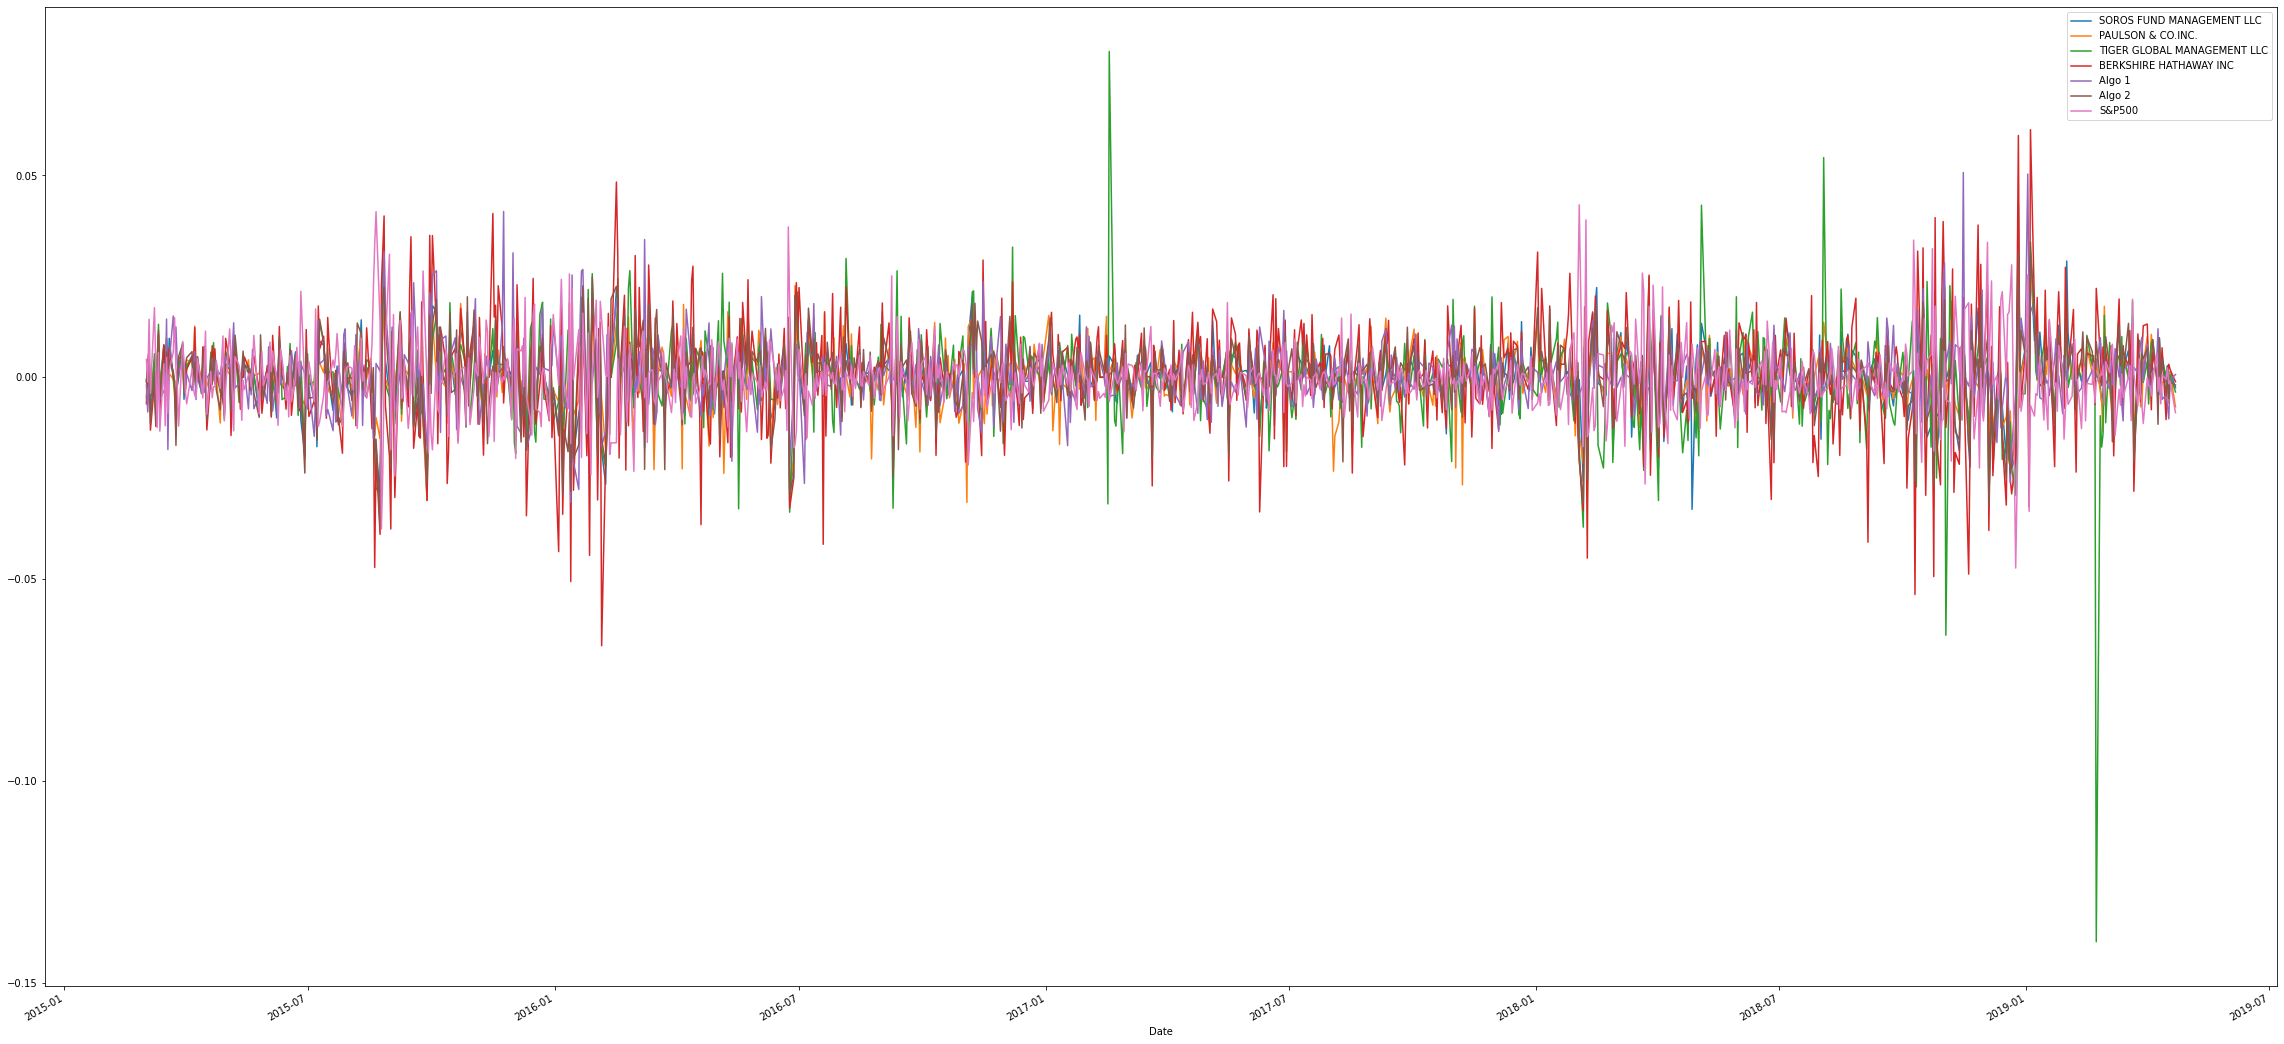

In [15]:
returns.plot(figsize = (40, 20))

In [16]:
cumulative_returns = (1 + returns).cumprod()
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

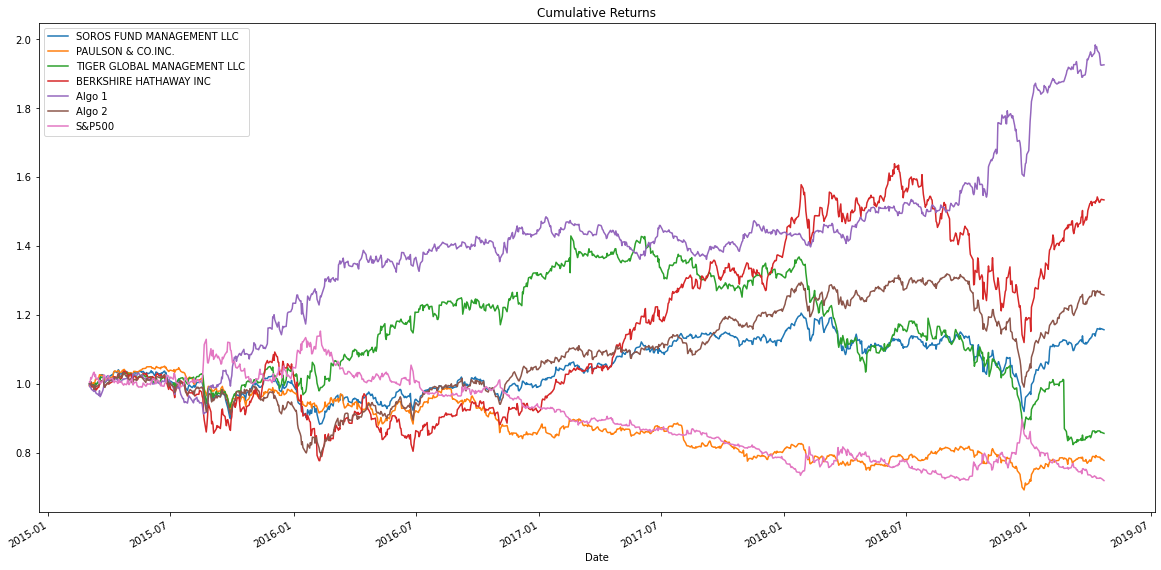

In [17]:
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

<AxesSubplot:>

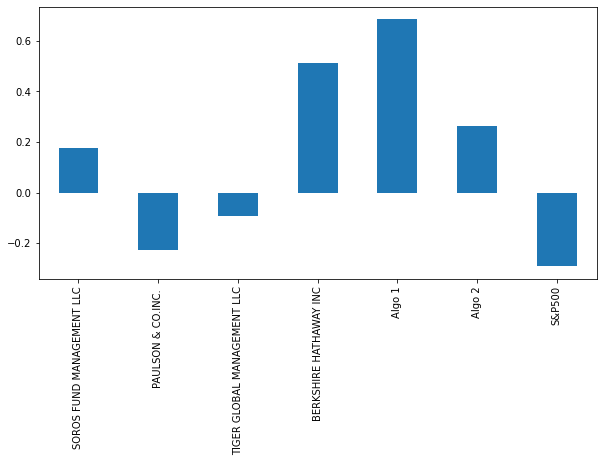

In [18]:
returns.sum().plot(kind = 'bar', figsize = (10, 5))

##### Box plot is created for returns and calculating standard deviations.

<AxesSubplot:>

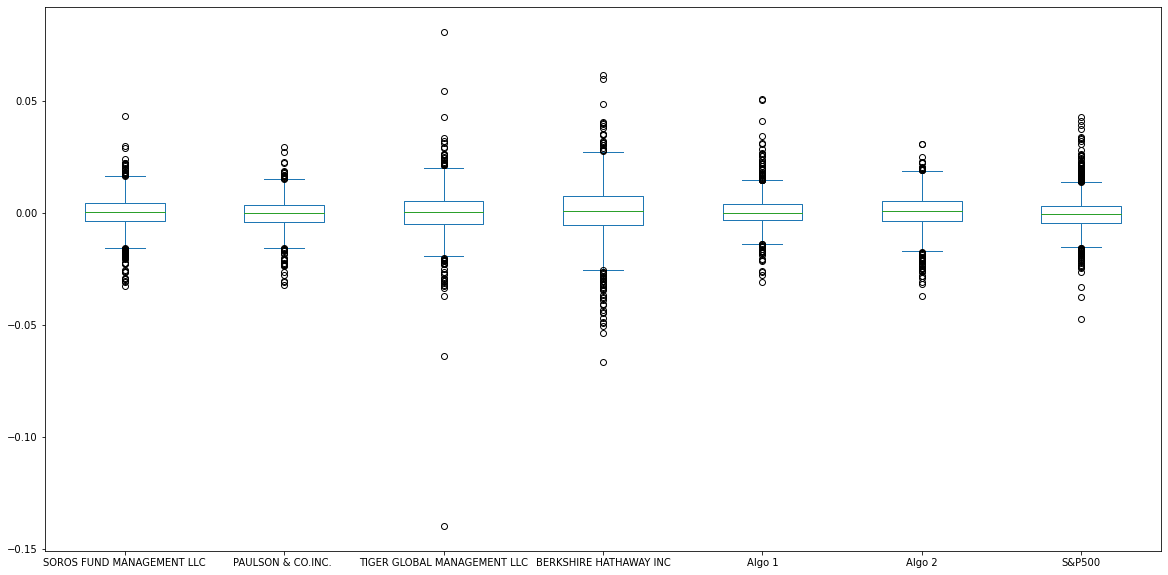

In [19]:
returns.plot(kind = 'box', figsize = (20, 10))

In [20]:
stds = returns.std().sort_values()
stds

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P500                         0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [21]:
sp500_std = stds.loc['S&P500']
greater_stds = stds.drop(stds[stds >= sp500_std].index)
greater_stds

PAULSON & CO.INC.            0.007026
Algo 1                       0.007623
SOROS FUND MANAGEMENT LLC    0.007896
Algo 2                       0.008341
dtype: float64

##### Annualized standard deviations are calculated for all portfolios.

In [22]:
annualized_stds = stds * np.sqrt(252)
annualized_stds

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P500                         0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

##### Rolling standard deviations with 21 day window are calculated for all portfolios.

In [23]:
rolling_stds = returns.rolling(21).std()
rolling_stds

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

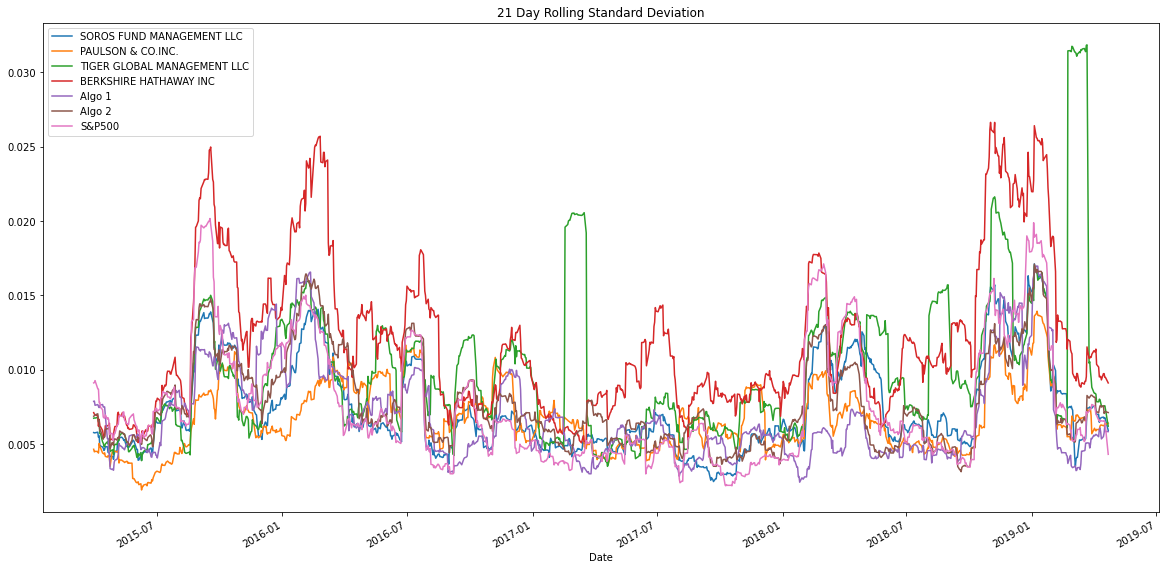

In [24]:
rolling_stds.plot(figsize = (20, 10), title = '21 Day Rolling Standard Deviation')

In [25]:
returns_correlations = returns.corr()
returns_correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [26]:
returns_correlations.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [27]:
sp500_soros_rolling_variance = returns['S&P500'].rolling(window = 60).var()
sp500_soros_rolling_variance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500, Length: 1042, dtype: float64

In [28]:
sp500_soros_rolling_covariance = returns['SOROS FUND MANAGEMENT LLC'].rolling(window = 60).cov(returns['S&P500'])
sp500_soros_rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000006
2019-04-16    0.000005
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000006
Length: 1042, dtype: float64

<AxesSubplot:title={'center':'60 Day Rolling Beta'}, xlabel='Date'>

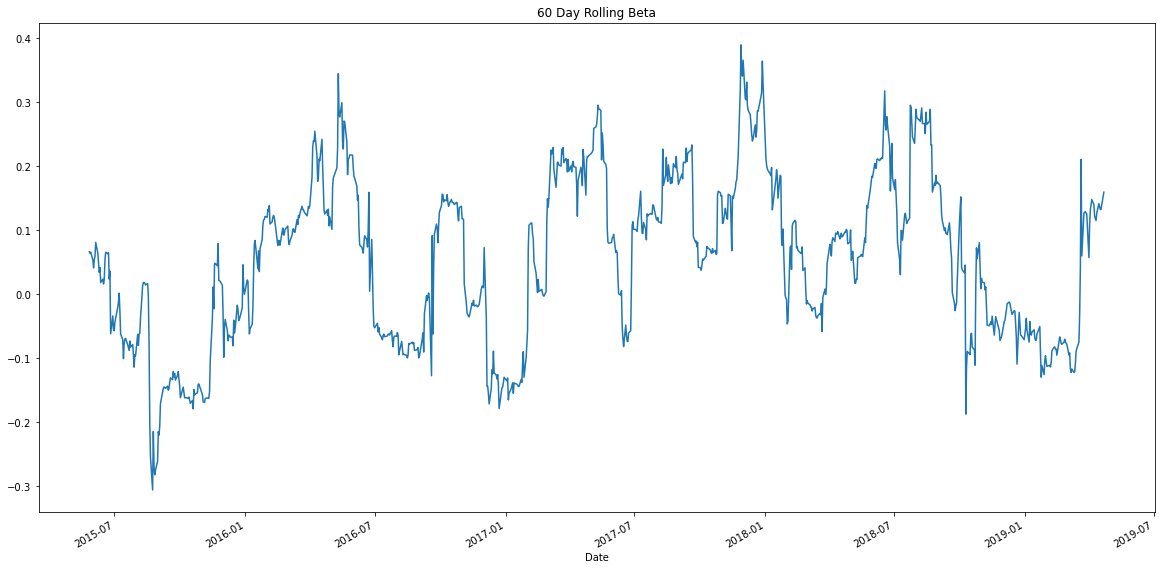

In [29]:
sp500_soros_rolling_beta = sp500_soros_rolling_covariance / sp500_soros_rolling_variance
sp500_soros_rolling_beta.plot(figsize = (20, 10), title = '60 Day Rolling Beta')

In [30]:
returns['Risk Free Rate'] = .0002
returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Risk Free Rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.0002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.0002
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.0002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.0002
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.0002
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.0002
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.0002
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.0002


<AxesSubplot:>

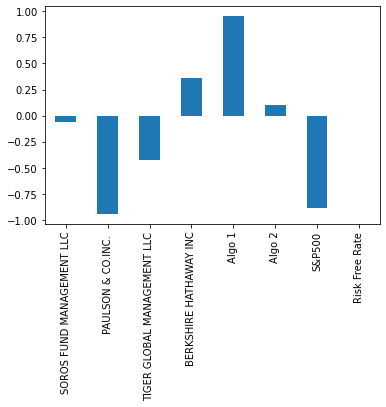

In [31]:
sharpe_ratios = ((returns.mean() - returns['Risk Free Rate'].mean()) * 252) / (returns.std() * np.sqrt(252))
sharpe_ratios.plot(kind = 'bar')

Algorithmic strategies 1 and 2 have better Sharpe ratios than the S&P500 and all other portfolios except Berkshire Hathaway.

In [32]:
aapl_historical = pd.read_csv('./Resources/aapl_historical.csv', parse_dates = True, index_col = 'Trade DATE', infer_datetime_format = True)
cost_historical = pd.read_csv('./Resources/cost_historical.csv', parse_dates = True, index_col = 'Trade DATE', infer_datetime_format = True)
goog_historical = pd.read_csv('./Resources/goog_historical.csv', parse_dates = True, index_col = 'Trade DATE', infer_datetime_format = True)

In [33]:
aapl_historical = aapl_historical.sort_index().rename(columns = {'NOCP': 'AAPL'}).drop(columns = ['Symbol'])
aapl_historical.index.names = ['date']

cost_historical = cost_historical.sort_index().rename(columns = {'NOCP': 'COST'}).drop(columns = ['Symbol'])
cost_historical.index.names = ['date']

goog_historical = goog_historical.sort_index().rename(columns = {'NOCP': 'GOOG'}).drop(columns = ['Symbol'])
goog_historical.index.names = ['date']

In [34]:
custom_stocks = pd.concat([aapl_historical, cost_historical, goog_historical], axis = 1).dropna()
custom_stocks

,AAPL,COST,GOOG
date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [35]:
weights = [0.33, 0.33, 0.34]
custom_portfolio_returns = custom_stocks.pct_change().dot(weights)
custom_portfolio_returns

date
2018-05-11         NaN
2018-05-14    0.000033
2018-05-15   -0.010154
2018-05-16    0.009333
2018-05-17   -0.001608
                ...   
2019-05-03    0.013391
2019-05-06   -0.004478
2019-05-07   -0.018739
2019-05-08   -0.000609
2019-05-09   -0.001767
Length: 250, dtype: float64

In [36]:
combined_returns = pd.concat([returns, custom_portfolio_returns], axis = 1).dropna().rename(columns = {0: 'Custom'})
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Risk Free Rate,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.0002,0.000033
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,0.0002,-0.010154
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.0002,0.009333
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.0002,-0.001608
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,0.0002,-0.006113
...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.0002,0.007473
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.0002,0.000386
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.0002,0.009274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.0002,0.001530


In [37]:
combined_stds = combined_returns.std().sort_values()
combined_annualized_stds = combined_stds * np.sqrt(252)
combined_annualized_stds


Risk Free Rate                 1.207343e-17
PAULSON & CO.INC.              1.169278e-01
Algo 1                         1.339272e-01
Algo 2                         1.394994e-01
SOROS FUND MANAGEMENT LLC      1.468116e-01
S&P500                         1.524686e-01
Custom                         2.117235e-01
TIGER GLOBAL MANAGEMENT LLC    2.328977e-01
BERKSHIRE HATHAWAY INC         2.473053e-01
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

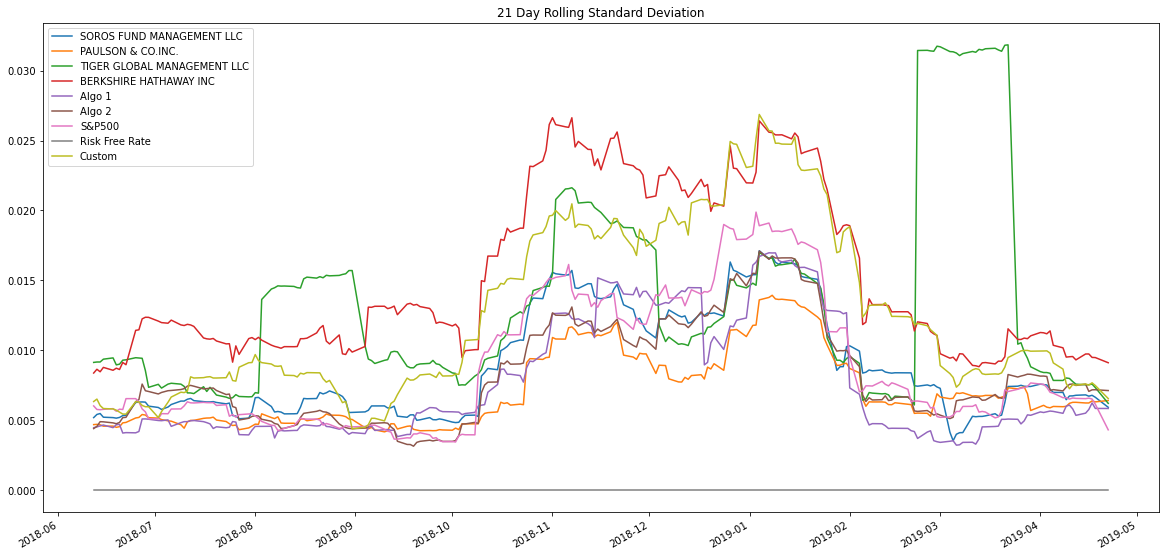

In [38]:
combined_rolling_stds = combined_returns.rolling(21).std()
combined_rolling_stds.plot(figsize = (20, 10), title = '21 Day Rolling Standard Deviation')

In [39]:
combined_returns_correlations = combined_returns.drop(columns = ['Risk Free Rate']).corr()
combined_returns_correlations.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.733134
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643787
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390379
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.802146
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260893
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739528
S&P500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005145
Custom,0.733134,0.643787,0.390379,0.802146,0.260893,0.739528,0.005145,1.000000


In [40]:
custom_variance = combined_returns['Custom'].var()
sp500_custom_covariance = combined_returns['Custom'].cov(combined_returns['S&P500'])
sp500_custom_beta = sp500_custom_covariance / custom_variance
sp500_custom_beta

0.003705078105261728

<AxesSubplot:title={'center':'60 Day Rolling Beta'}>

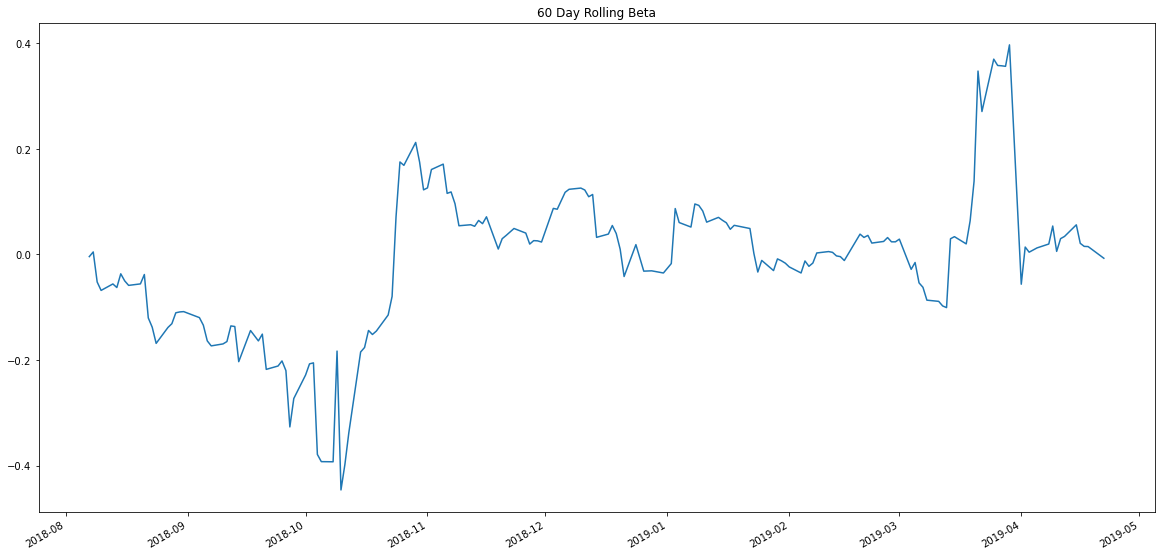

In [41]:
sp500_custom_rolling_variance = returns['S&P500'].rolling(window = 60).var()
sp500_custom_rolling_covariance = combined_returns['Custom'].rolling(window = 60).cov(combined_returns['S&P500'])
sp500_custom_rolling_beta = sp500_custom_rolling_covariance / sp500_custom_rolling_variance
sp500_custom_rolling_beta.plot(figsize = (20, 10), title = '60 Day Rolling Beta')

<AxesSubplot:>

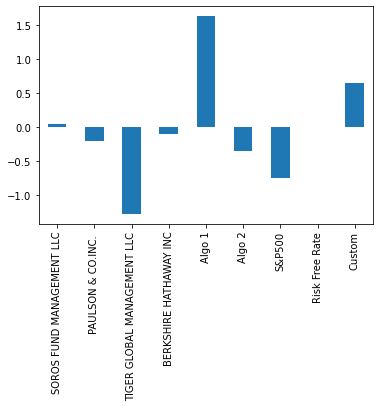

In [42]:
combined_sharpe_ratios = ((combined_returns.mean() - combined_returns['Risk Free Rate'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe_ratios.plot(kind = 'bar')

Our custom portfolio has a better Sharpe ratio than all other portfolios except Algo 1.